<h2>House Price Regression - Data Cleaning Notebook</h2>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print("Training data size: ",train_df.shape)
print("Testing data size: ",test_df.shape)

Training data size:  (1460, 81)
Testing data size:  (1459, 80)


<h3>Working on the training dataset</h3>

#### Finding missing values in the training dataset using the heatmap

<AxesSubplot:>

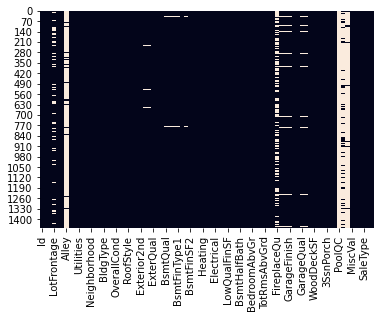

In [5]:
sns.heatmap(train_df.isnull(), cbar=False)

#### Finding the variables with missing values and creating the list for such variables

In [6]:
columns = []
columns = train_df.columns
counts = []
counts = train_df.isnull().sum()
dict = {"Columns":columns, "Counts":counts} 
value_count = pd.DataFrame.from_dict(dict, orient='index').transpose()
value_count.head()
value_count.to_csv('missing_values.csv',index=False)

#### Missing values

In [7]:
print("Alley",train_df['Alley'].isnull().sum())
print("FireplaceQu",train_df['FireplaceQu'].isnull().sum())
print("PoolQC",train_df['PoolQC'].isnull().sum())
print("Fence",train_df['Fence'].isnull().sum())
print("MiscFeature",train_df['MiscFeature'].isnull().sum())

Alley 1369
FireplaceQu 690
PoolQC 1453
Fence 1179
MiscFeature 1406


#### Dropping columns that have more than 50% values are missing

In [8]:
train_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

### Feature Engineering

#### Going feature by feature to resolve missing values issue (Training dataset)

In [9]:
# LotFrontage
print(train_df['LotFrontage'].describe())
print(train_df['LotFrontage'].isnull().sum())
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace=True)
print(train_df['LotFrontage'].isnull().sum())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
259
0


In [10]:
# MasVnrType
print(train_df['MasVnrType'].value_counts())
print("Count before replacing missing values: ", train_df['MasVnrType'].isnull().sum())
train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0], inplace=True)
print("Count after replacing missing values: ", train_df['MasVnrType'].isnull().sum())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Count before replacing missing values:  8
Count after replacing missing values:  0


In [11]:
# MasVnrArea
print(train_df['MasVnrArea'].describe())
print("Missing values before replacement: ",train_df['MasVnrArea'].isnull().sum())
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)
print("Missing values before replacement: ",train_df['MasVnrArea'].isnull().sum())

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
Missing values before replacement:  8
Missing values before replacement:  0


In [12]:
#BsmtQual
print(train_df['BsmtQual'].value_counts())
print("Missing values before replacement: ", train_df['BsmtQual'].isnull().sum())
train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['BsmtQual'].isnull().sum())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Missing values before replacement:  37
Missing values after replacement:  0


In [13]:
#BsmtCond
print(train_df['BsmtCond'].value_counts())
print("Missing values before replacement: ", train_df['BsmtCond'].isnull().sum())
train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['BsmtCond'].isnull().sum())

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Missing values before replacement:  37
Missing values after replacement:  0


In [14]:
#BsmtExposure
print(train_df['BsmtExposure'].value_counts())
print("Missing values before replacement: ", train_df['BsmtExposure'].isnull().sum())
train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['BsmtExposure'].isnull().sum())

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Missing values before replacement:  38
Missing values after replacement:  0


In [15]:
#BsmtFinType1
print(train_df['BsmtFinType1'].value_counts())
print("Missing values before replacement: ", train_df['BsmtFinType1'].isnull().sum())
train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['BsmtFinType1'].isnull().sum())

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Missing values before replacement:  37
Missing values after replacement:  0


In [16]:
#BsmtFinType2
print(train_df['BsmtFinType2'].value_counts())
print("Missing values before replacement: ", train_df['BsmtFinType2'].isnull().sum())
train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['BsmtFinType2'].isnull().sum())

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Missing values before replacement:  38
Missing values after replacement:  0


In [17]:
#Electrical
print(train_df['Electrical'].value_counts())
print("Missing values before replacement: ", train_df['Electrical'].isnull().sum())
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['Electrical'].isnull().sum())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Missing values before replacement:  1
Missing values after replacement:  0


In [18]:
#FireplaceQu
print(train_df['FireplaceQu'].value_counts())
print("Missing values before replacement: ", train_df['FireplaceQu'].isnull().sum())
train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['FireplaceQu'].isnull().sum())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Missing values before replacement:  690
Missing values after replacement:  0


In [19]:
#GarageType
print(train_df['GarageType'].value_counts())
print("Missing values before replacement: ", train_df['GarageType'].isnull().sum())
train_df['GarageType'].fillna(train_df['GarageType'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['GarageType'].isnull().sum())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Missing values before replacement:  81
Missing values after replacement:  0


In [20]:
#GarageYrBlt
print(train_df['GarageYrBlt'].describe())
print("Missing values before replacement: ", train_df['GarageYrBlt'].isnull().sum())
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)
print("Missing values after replacement: ", train_df['GarageYrBlt'].isnull().sum())

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
Missing values before replacement:  81
Missing values after replacement:  0


In [21]:
#GarageFinish
print(train_df['GarageFinish'].value_counts())
print("Missing values before replacement: ", train_df['GarageFinish'].isnull().sum())
train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['GarageFinish'].isnull().sum())

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Missing values before replacement:  81
Missing values after replacement:  0


In [22]:
#GarageQual
print(train_df['GarageQual'].value_counts())
print("Missing values before replacement: ", train_df['GarageQual'].isnull().sum())
train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['GarageQual'].isnull().sum())

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
Missing values before replacement:  81
Missing values after replacement:  0


In [23]:
#GarageCond
print(train_df['GarageCond'].value_counts())
print("Missing values before replacement: ", train_df['GarageCond'].isnull().sum())
train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0], inplace=True)
print("Missing values after replacement: ", train_df['GarageCond'].isnull().sum())

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Missing values before replacement:  81
Missing values after replacement:  0


(1460, 77)

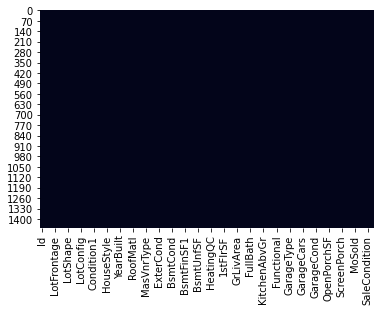

In [24]:
sns.heatmap(train_df.isnull(), cbar=False)
train_df.shape

In [25]:
train_df.to_csv("train_clean.csv", index=False)

### Working on the test dataset

#### Finding missing values in the test dataset using the heatmap

<AxesSubplot:>

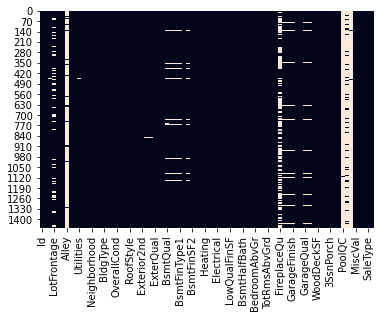

In [26]:
sns.heatmap(test_df.isnull(), cbar=False)

#### Finding the variables with missing values and creating the list for such variables

In [27]:
columns1 = []
columns1 = train_df.columns
counts1 = []
counts1 = test_df.isnull().sum()
dict = {"Columns":columns1, "Counts":counts1} 
value_count1 = pd.DataFrame.from_dict(dict, orient='index').transpose()
value_count1.head()
value_count1.to_csv('missing_values_test.csv',index=False)

#### Missing values

In [28]:
print("Alley",test_df['Alley'].isnull().sum())
print("FireplaceQu",test_df['FireplaceQu'].isnull().sum())
print("PoolQC",test_df['PoolQC'].isnull().sum())
print("Fence",test_df['Fence'].isnull().sum())
print("MiscFeature",test_df['MiscFeature'].isnull().sum())

Alley 1352
FireplaceQu 730
PoolQC 1456
Fence 1169
MiscFeature 1408


#### Dropping columns that have more than 50% values are missing

In [29]:
test_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

### Feature Engineering

#### Going feature by feature to resolve missing values issue (Test dataset)

In [30]:
#MSZoning
print(test_df['MSZoning'].value_counts())
print("Missing values before replacement: ", test_df['MSZoning'].isnull().sum())
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['MSZoning'].isnull().sum())

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
Missing values before replacement:  4
Missing values after replacement:  0


In [31]:
#LotFrontage
print(test_df['LotFrontage'].describe())
print("Missing values before replacement: ", test_df['LotFrontage'].isnull().sum())
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(), inplace=True)
print("Missing values after replacement: ", test_df['LotFrontage'].isnull().sum())

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64
Missing values before replacement:  227
Missing values after replacement:  0


In [32]:
#Utilities
print(test_df['Utilities'].value_counts())
print("Missing values before replacement: ", test_df['Utilities'].isnull().sum())
test_df['Utilities'].fillna(test_df['Utilities'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['Utilities'].isnull().sum())

AllPub    1457
Name: Utilities, dtype: int64
Missing values before replacement:  2
Missing values after replacement:  0


In [33]:
#Exterior1st
print(test_df['Exterior1st'].value_counts())
print("Missing values before replacement: ", test_df['Exterior1st'].isnull().sum())
test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['Exterior1st'].isnull().sum())

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64
Missing values before replacement:  1
Missing values after replacement:  0


In [34]:
#Exterior2nd
print(test_df['Exterior2nd'].value_counts())
print("Missing values before replacement: ", test_df['Exterior2nd'].isnull().sum())
test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['Exterior2nd'].isnull().sum())

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64
Missing values before replacement:  1
Missing values after replacement:  0


In [35]:
#MasVnrType
print(test_df['MasVnrType'].value_counts())
print("Missing values before replacement: ", test_df['MasVnrType'].isnull().sum())
test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['MasVnrType'].isnull().sum())

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64
Missing values before replacement:  16
Missing values after replacement:  0


In [36]:
#MasVnrArea
print(test_df['MasVnrArea'].describe())
print("Missing values before replacement: ", test_df['MasVnrArea'].isnull().sum())
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(), inplace=True)
print("Missing values after replacement: ", test_df['MasVnrArea'].isnull().sum())

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64
Missing values before replacement:  15
Missing values after replacement:  0


In [37]:
#BsmtQual
print(test_df['BsmtQual'].value_counts())
print("Missing values before replacement: ", test_df['BsmtQual'].isnull().sum())
test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['BsmtQual'].isnull().sum())

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64
Missing values before replacement:  44
Missing values after replacement:  0


In [38]:
#BsmtCond
print(test_df['BsmtCond'].value_counts())
print("Missing values before replacement: ", test_df['BsmtCond'].isnull().sum())
test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['BsmtCond'].isnull().sum())

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64
Missing values before replacement:  45
Missing values after replacement:  0


In [39]:
#BsmtExposure
print(test_df['BsmtExposure'].value_counts())
print("Missing values before replacement: ", test_df['BsmtExposure'].isnull().sum())
test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['BsmtExposure'].isnull().sum())

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64
Missing values before replacement:  44
Missing values after replacement:  0


In [40]:
#BsmtFinType1
print(test_df['BsmtFinType1'].value_counts())
print("Missing values before replacement: ", test_df['BsmtFinType1'].isnull().sum())
test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['BsmtFinType1'].isnull().sum())

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64
Missing values before replacement:  42
Missing values after replacement:  0


In [41]:
#BsmtFinSF1
print(test_df['BsmtFinSF1'].describe())
print("Missing values before replacement: ", test_df['BsmtFinSF1'].isnull().sum())
test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean(), inplace=True)
print("Missing values after replacement: ", test_df['BsmtFinSF1'].isnull().sum())

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64
Missing values before replacement:  1
Missing values after replacement:  0


In [42]:
#BsmtFinType2
print(test_df['BsmtFinType2'].value_counts())
print("Missing values before replacement: ", test_df['BsmtFinType2'].isnull().sum())
test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['BsmtFinType2'].isnull().sum())

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64
Missing values before replacement:  42
Missing values after replacement:  0


In [43]:
#BsmtFinSF2
print(test_df['BsmtFinSF2'].describe())
print("Missing values before replacement: ", test_df['BsmtFinSF2'].isnull().sum())
test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean(), inplace=True)
print("Missing values after replacement: ", test_df['BsmtFinSF2'].isnull().sum())

count    1458.000000
mean       52.619342
std       176.753926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
Missing values before replacement:  1
Missing values after replacement:  0


In [44]:
#BsmtUnfSF
print(test_df['BsmtUnfSF'].describe())
print("Missing values before replacement: ", test_df['BsmtUnfSF'].isnull().sum())
test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean(), inplace=True)
print("Missing values after replacement: ", test_df['BsmtUnfSF'].isnull().sum())

count    1458.000000
mean      554.294925
std       437.260486
min         0.000000
25%       219.250000
50%       460.000000
75%       797.750000
max      2140.000000
Name: BsmtUnfSF, dtype: float64
Missing values before replacement:  1
Missing values after replacement:  0


In [45]:
#TotalBsmtSF
print(test_df['TotalBsmtSF'].describe())
print("Missing values before replacement: ", test_df['TotalBsmtSF'].isnull().sum())
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean(), inplace=True)
print("Missing values after replacement: ", test_df['TotalBsmtSF'].isnull().sum())

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64
Missing values before replacement:  1
Missing values after replacement:  0


In [46]:
#BsmtFullBath
print(test_df['BsmtFullBath'].value_counts())
print("Missing values before replacement: ", test_df['BsmtFullBath'].isnull().sum())
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['BsmtFullBath'].isnull().sum())

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64
Missing values before replacement:  2
Missing values after replacement:  0


In [47]:
#BsmtHalfBath
print(test_df['BsmtHalfBath'].value_counts())
print("Missing values before replacement: ", test_df['BsmtHalfBath'].isnull().sum())
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['BsmtHalfBath'].isnull().sum())

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64
Missing values before replacement:  2
Missing values after replacement:  0


In [48]:
#KitchenQual
print(test_df['KitchenQual'].value_counts())
print("Missing values before replacement: ", test_df['KitchenQual'].isnull().sum())
test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['KitchenQual'].isnull().sum())

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64
Missing values before replacement:  1
Missing values after replacement:  0


In [49]:
#Functional
print(test_df['Functional'].value_counts())
print("Missing values before replacement: ", test_df['Functional'].isnull().sum())
test_df['Functional'].fillna(test_df['Functional'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['Functional'].isnull().sum())

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64
Missing values before replacement:  2
Missing values after replacement:  0


In [50]:
#FireplaceQu
print(test_df['FireplaceQu'].value_counts())
print("Missing values before replacement: ", test_df['FireplaceQu'].isnull().sum())
test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['FireplaceQu'].isnull().sum())

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64
Missing values before replacement:  730
Missing values after replacement:  0


In [51]:
#GarageType
print(test_df['GarageType'].value_counts())
print("Missing values before replacement: ", test_df['GarageType'].isnull().sum())
test_df['GarageType'].fillna(test_df['GarageType'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['GarageType'].isnull().sum())

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64
Missing values before replacement:  76
Missing values after replacement:  0


In [52]:
#GarageYrBlt
print(test_df['GarageYrBlt'].describe())
print("Missing values before replacement: ", test_df['GarageYrBlt'].isnull().sum())
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median(), inplace=True)
print("Missing values after replacement: ", test_df['GarageYrBlt'].isnull().sum())

count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64
Missing values before replacement:  78
Missing values after replacement:  0


In [53]:
#GarageFinish
print(test_df['GarageFinish'].value_counts())
print("Missing values before replacement: ", test_df['GarageFinish'].isnull().sum())
test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['GarageFinish'].isnull().sum())

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64
Missing values before replacement:  78
Missing values after replacement:  0


In [54]:
#GarageCars
print(test_df['GarageCars'].value_counts())
print("Missing values before replacement: ", test_df['GarageCars'].isnull().sum())
test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['GarageCars'].isnull().sum())

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64
Missing values before replacement:  1
Missing values after replacement:  0


In [55]:
#GarageArea
print(test_df['GarageArea'].describe())
print("Missing values before replacement: ", test_df['GarageArea'].isnull().sum())
test_df['GarageArea'].fillna(test_df['GarageArea'].mean(), inplace=True)
print("Missing values after replacement: ", test_df['GarageArea'].isnull().sum())

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64
Missing values before replacement:  1
Missing values after replacement:  0


In [56]:
#GarageQual
print(test_df['GarageQual'].value_counts())
print("Missing values before replacement: ", test_df['GarageQual'].isnull().sum())
test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['GarageQual'].isnull().sum())

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64
Missing values before replacement:  78
Missing values after replacement:  0


In [57]:
#GarageCond
print(test_df['GarageCond'].value_counts())
print("Missing values before replacement: ", test_df['GarageCond'].isnull().sum())
test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['GarageCond'].isnull().sum())

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64
Missing values before replacement:  78
Missing values after replacement:  0


In [58]:
#SaleType
print(test_df['SaleType'].value_counts())
print("Missing values before replacement: ", test_df['SaleType'].isnull().sum())
test_df['SaleType'].fillna(test_df['SaleType'].mode()[0], inplace=True)
print("Missing values after replacement: ", test_df['SaleType'].isnull().sum())

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64
Missing values before replacement:  1
Missing values after replacement:  0


(1459, 76)

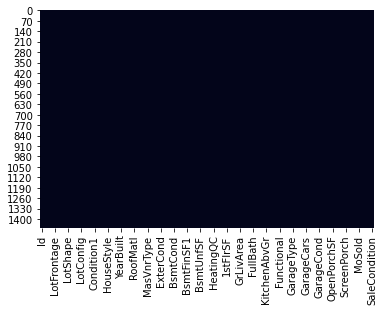

In [59]:
sns.heatmap(test_df.isnull(), cbar=False)
test_df.shape

In [60]:
test_df.to_csv("test_clean.csv", index=False)